<a href="https://colab.research.google.com/github/Jugranada/Se-ales_sistemas/blob/main/Copia_de_Parcial_2_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  **Ecuación diferencial ordinaria del sistema mecánico**

Se modela el sistema masa-resorte-amortiguador con la siguiente ecuación diferencial:

$$
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = x(t)
$$

A continuación se define esta EDO simbólicamente con Sympy.


In [7]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

                         2              
  d                     d               
c⋅──(y(t)) + k⋅y(t) + m⋅───(y(t)) = x(t)
  dt                      2             
                        dt              

###  **Función de transferencia del sistema mecánico**

Se obtiene la función de transferencia del sistema introduciendo una entrada exponencial y una salida proporcional a esa entrada en la ecuación diferencial:

- Entrada: $$ x(t) = e^{st} $$
- Salida: $$ y(t) = H(s) \cdot e^{st} $$

1.   Elemento de la lista
2.   Elemento de la lista



Al sustituir en la EDO y simplificar, se despeja  H(s) , que representa la función de transferencia en el dominio de Laplace.


In [8]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

###  **Ecuación diferencial del circuito eléctrico**

Se modela el comportamiento de un circuito RLC en configuración serie/paralelo, utilizando la ley de Kirchhoff para obtener la ecuación diferencial que relaciona el voltaje de entrada y salida:

- Entrada: $x(t) = V\!_i(t)$  
- Salida: $y(t) = V\!_o(t)$

La ecuación diferencial resultante es:

$$
LC \frac{d^2 V\!_o(t)}{dt^2} + \frac{L}{R} \frac{d V\!_o(t)}{dt} + V\!_o(t) = V\!_i(t)
$$

A continuación, se define esta ecuación en Sympy para su análisis simbólico.


In [9]:
%matplotlib inline
import sympy as sym
sym.init_printing()

# Definición simbólica
t, L, R, C = sym.symbols('t L R C', real=True)
s = sym.symbols('s')
Vi = sym.Function('Vi')(t)
Vo = sym.Function('Vo')(t)

# Ecuación diferencial con notación Vi y Vo
edo_rlc = sym.Eq(L*C*Vo.diff(t, 2) + (L/R)*Vo.diff(t) + Vo, Vi)
edo_rlc

                   d                        
     2           L⋅──(Vo(t))                
    d              dt                       
C⋅L⋅───(Vo(t)) + ─────────── + Vo(t) = Vi(t)
      2               R                     
    dt                                      

##  **Función de Transferencia del Circuito**

se toma la ecuación diferencial simbólica del circuito  y le aplica la transformada de Laplace (suponiendo condiciones iniciales cero), sustituyendo:

$$
Vi(t) = e^{st}, \quad Vo(t) = H(s) \cdot e^{st}
$$



$$
H(s) = \frac{1}{L C s^2 + \frac{L}{R} s + 1}
$$

---



In [10]:
H = sym.Function('H')(s)

# Sustitución y resolución
H, = sym.solve(edo_rlc.subs(Vi, sym.exp(s*t)).subs(Vo, H*sym.exp(s*t)).doit(), H)
H

        R         
──────────────────
       2          
C⋅L⋅R⋅s  + L⋅s + R

In [11]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

H_c=control.TransferFunction(R,L*C*R*s**2 + L*s + R,s) #Funcion de transferencia con la API de control
RLC = {R: 2, L: sym.Rational('.8'), C: sym.Rational('.6')}#valores utilizados para la simulación
H_c

        R         
──────────────────
       2          
C⋅L⋅R⋅s  + L⋅s + R

**Diagrama de bode**

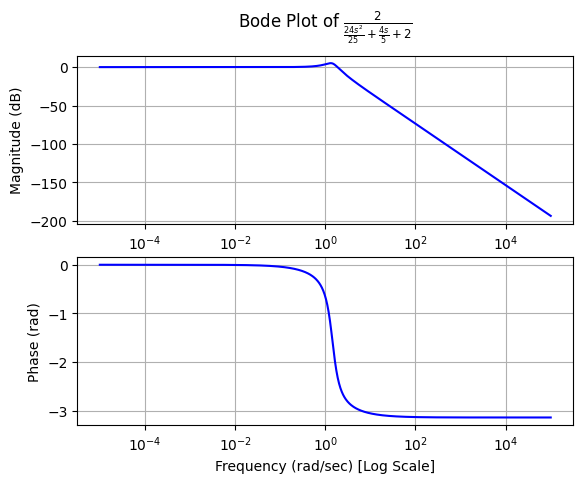

In [12]:
HRLC=control.TransferFunction(H_c.num.subs(RLC),H_c.den.subs(RLC),s)
control.bode_plot(HRLC)


 Respuestas - Lazo Abierto


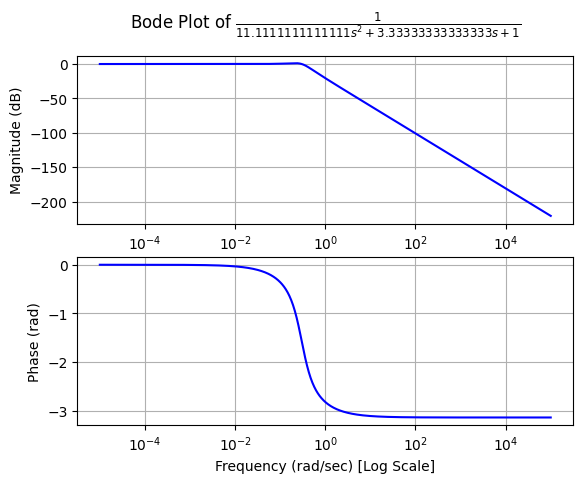

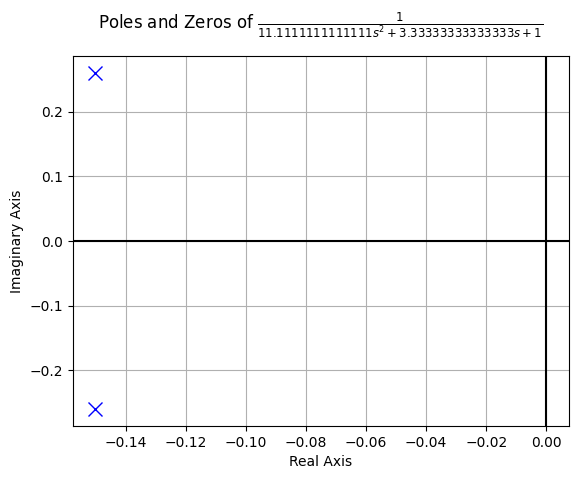

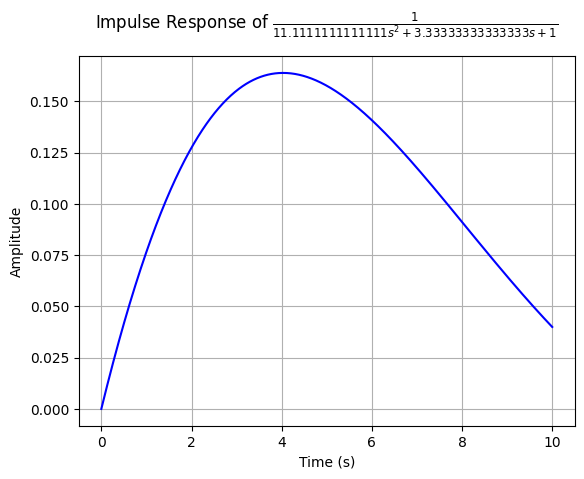

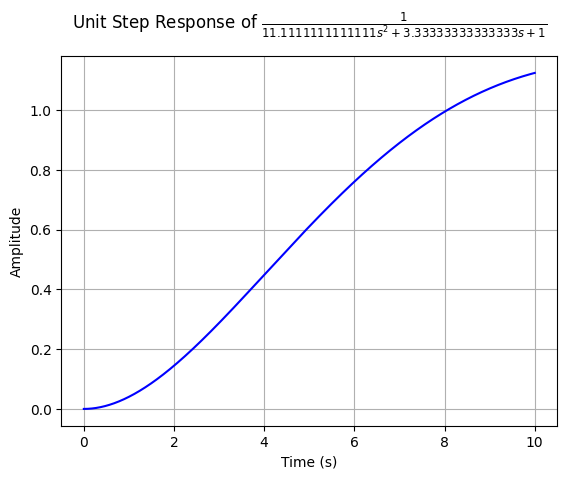

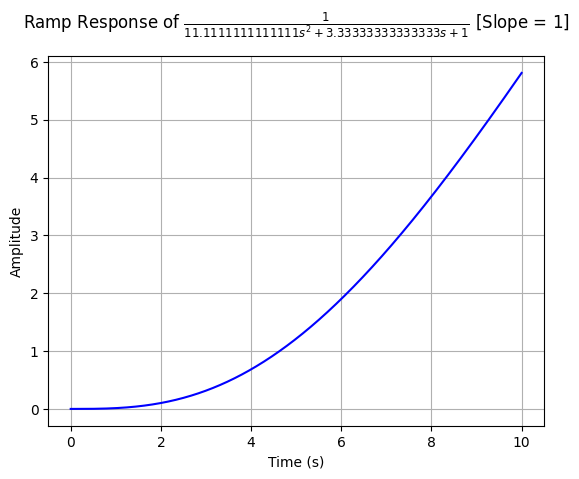


 Respuestas - Lazo Cerrado


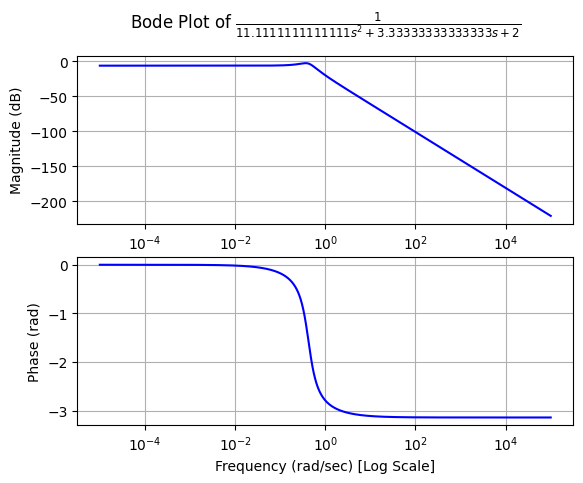

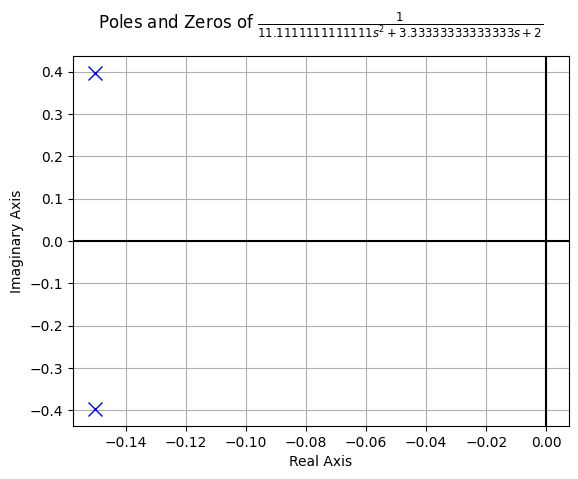

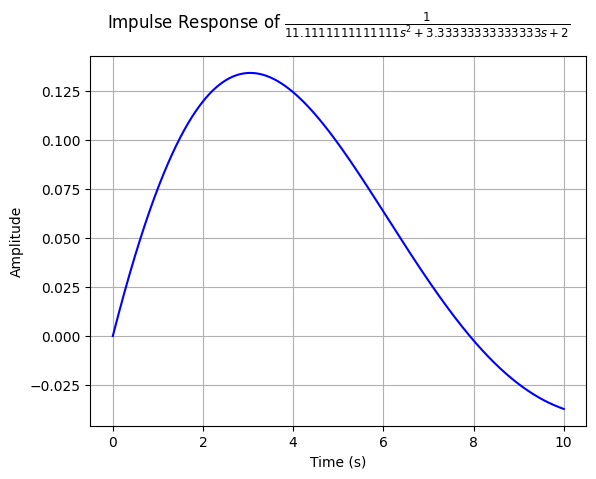

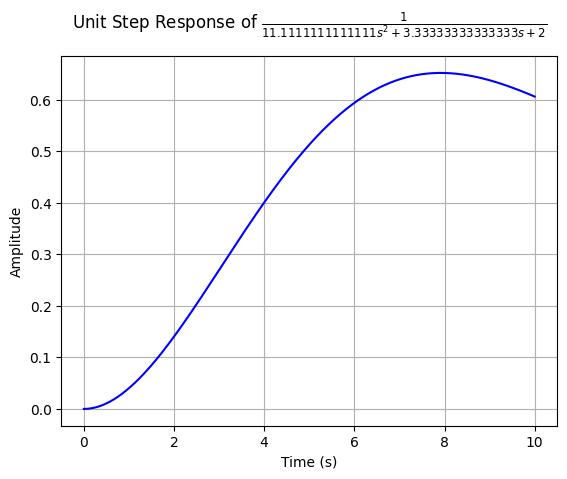

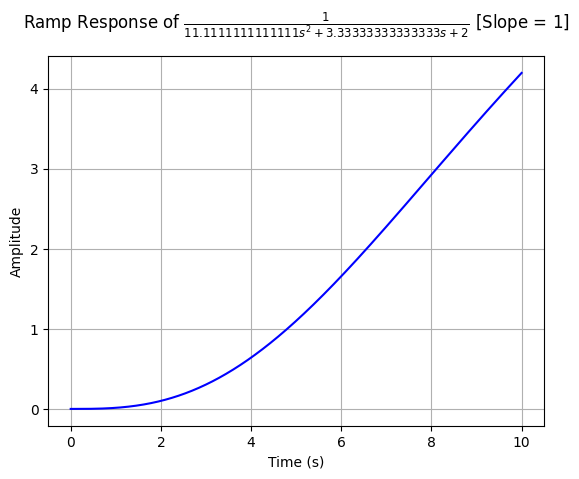

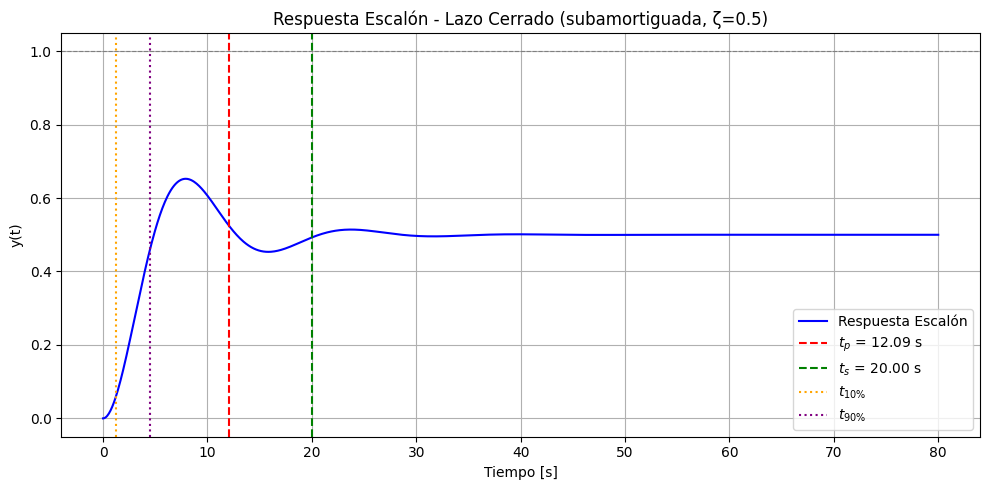


🔧 Parámetros Calculados:
- Tipo de respuesta: subamortiguada
- Factor de amortiguamiento (ζ): 0.5
- Frecuencia natural (ωₙ): 0.3 rad/s
- C (fijo): 0.0100 F
- L: 1111.1111 H
- R: 333.3333 Ω

 Parámetros Temporales:
- Tiempo al pico (tp): 12.09 s
- Sobreimpulso máximo (Mp): 30.50 %
- Tiempo de establecimiento (ts): 20.00 s
- Tiempo de levantamiento (tu): 3.28 s

 Sistema Mecánico Equivalente (Masa-Resorte-Amortiguador):
- Masa (m): 11.1111 kg
- Amortiguador (c): 3.3333 N·s/m
- Constante del resorte (k): 1.0000 N/m


In [13]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control
import numpy as np

sym.init_printing()

# --- 1. Definición de símbolos y variables ---
s, t = sym.symbols('s t', complex=True)
R, L, C = sym.symbols('R L C', positive=True)
omega_n = 0.3  # Frecuencia natural deseada
tipo_respuesta = "subamortiguada"  # Cambiar a: subamortiguada, sobreamortiguada, critica, inestable

# --- 2. Selección del factor de amortiguamiento ---
if tipo_respuesta == "subamortiguada":
    factor_amortiguamiento = 0.5
elif tipo_respuesta == "sobreamortiguada":
    factor_amortiguamiento = 1.5
elif tipo_respuesta == "critica":
    factor_amortiguamiento = 1.0
elif tipo_respuesta == "inestable":
    factor_amortiguamiento = -0.2
else:
    raise ValueError("Tipo de respuesta no válido")

# --- 3. Fijar C y calcular L, R ---
C_valor = 0.01  # Fijo
L_valor = 1 / (C_valor * omega_n**2)
R_valor = 1 / (2 * C_valor * omega_n * factor_amortiguamiento)

RLC = {R: R_valor, L: L_valor, C: C_valor}

# --- 4. Función de transferencia H(s) en lazo abierto ---
H_abierto = control.TransferFunction(1, L*C*s**2 + R*C*s + 1, s)
H_abierto_valores = control.TransferFunction(H_abierto.num.subs(RLC), H_abierto.den.subs(RLC), s)

# --- 5. Función de transferencia en lazo cerrado ---
# H_cerrado(s) = H(s)/(1 + H(s)) = N(s) / (D(s) + N(s))
num = H_abierto_valores.num
den = H_abierto_valores.den + H_abierto_valores.num
H_cerrado_valores = control.TransferFunction(num, den, s)

# --- 6. Gráficas - Lazo Abierto ---
print("\n Respuestas - Lazo Abierto")
control.bode_plot(H_abierto_valores)
control.pole_zero_plot(H_abierto_valores)
control.impulse_response_plot(H_abierto_valores)
control.step_response_plot(H_abierto_valores)
control.ramp_response_plot(H_abierto_valores)

# --- 7. Gráficas - Lazo Cerrado ---
print("\n Respuestas - Lazo Cerrado")
control.bode_plot(H_cerrado_valores)
control.pole_zero_plot(H_cerrado_valores)
control.impulse_response_plot(H_cerrado_valores)
control.step_response_plot(H_cerrado_valores)
control.ramp_response_plot(H_cerrado_valores)

# --- 8. Cálculo de respuesta escalón en el tiempo ---
Y_s = (H_cerrado_valores.num / (H_cerrado_valores.den * s)).expand()
y_t = sym.inverse_laplace_transform(Y_s, s, t)
y_t_func = sym.lambdify(t, y_t, modules='numpy')

tt = np.linspace(0, 80, 1000)
yy = y_t_func(tt)
y_final = yy[-1]

# --- 9. Cálculo de parámetros temporales ---
tp = Mp = ts = tu = None

if factor_amortiguamiento > 0:
    ts = 3 / (factor_amortiguamiento * omega_n)

    # Tiempo de levantamiento (10% a 90%)
    indices_10 = np.where(yy >= 0.1 * y_final)[0]
    indices_90 = np.where(yy >= 0.9 * y_final)[0]
    if indices_10.size and indices_90.size:
        tu = tt[indices_90[0]] - tt[indices_10[0]]

    # Solo calcular tp y Mp si subamortiguada
    if 0 < factor_amortiguamiento < 1:
        tp = np.pi / (omega_n * np.sqrt(1 - factor_amortiguamiento**2))
        x_max = np.max(yy)
        Mp = 100 * (x_max - y_final) / y_final

# --- 10. Graficar respuesta escalón con parámetros ---
plt.figure(figsize=(10, 5))
plt.plot(tt, yy, label="Respuesta Escalón", color='blue')
plt.title(f"Respuesta Escalón - Lazo Cerrado ({tipo_respuesta}, ζ={factor_amortiguamiento})")
plt.xlabel("Tiempo [s]")
plt.ylabel("y(t)")
plt.grid(True)
plt.axhline(1, color='gray', linestyle='--', linewidth=0.8)

# Marcar parámetros temporales si aplican
if tp:
    plt.axvline(tp, color='red', linestyle='--', label=f"$t_p$ = {tp:.2f} s")
if ts:
    plt.axvline(ts, color='green', linestyle='--', label=f"$t_s$ = {ts:.2f} s")
if tu and indices_10.size and indices_90.size:
    plt.axvline(tt[indices_10[0]], color='orange', linestyle=':', label=f"$t_{{10\%}}$")
    plt.axvline(tt[indices_90[0]], color='purple', linestyle=':', label=f"$t_{{90\%}}$")

plt.legend()
plt.tight_layout()
plt.show()

# --- 11. Imprimir resultados ---
print("\n🔧 Parámetros Calculados:")
print(f"- Tipo de respuesta: {tipo_respuesta}")
print(f"- Factor de amortiguamiento (ζ): {factor_amortiguamiento}")
print(f"- Frecuencia natural (ωₙ): {omega_n} rad/s")
print(f"- C (fijo): {C_valor:.4f} F")
print(f"- L: {L_valor:.4f} H")
print(f"- R: {R_valor:.4f} Ω")

# --- 12. Mostrar parámetros temporales ---
if factor_amortiguamiento > 0:
    print("\n Parámetros Temporales:")
    if tp: print(f"- Tiempo al pico (tp): {tp:.2f} s")
    if Mp: print(f"- Sobreimpulso máximo (Mp): {Mp:.2f} %")
    print(f"- Tiempo de establecimiento (ts): {ts:.2f} s")
    if tu: print(f"- Tiempo de levantamiento (tu): {tu:.2f} s")
else:
    print("\n⚠️ No se calculan parámetros temporales para este tipo de respuesta.")

# --- 13. Equivalente Mecánico según ecuación diferencial ---
# EDO masa:      m y'' + c y' + k y = x
# EDO eléctrica: LC V'' + (L/R) V' + V = Vi
# Relación:      m = LC, c = L/R, k = 1

m_valor = L_valor * C_valor
b_valor = L_valor / R_valor
k_valor = 1

print("\n Sistema Mecánico Equivalente (Masa-Resorte-Amortiguador):")
print(f"- Masa (m): {m_valor:.4f} kg")
print(f"- Amortiguador (c): {b_valor:.4f} N·s/m")
print(f"- Constante del resorte (k): {k_valor:.4f} N/m")

